In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

c:\Users\hp\Desktop\briefs\rag-it-support-assistant\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
questions_it = [
    "Qu'est-ce qui a changé sur le système avant l'incident ?", "Quand le problème a-t-il commencé ?", 
    "Comment le problème s'est-il manifesté ?", "Le problème est-il déjà survenu auparavant ?", 
    "Est-ce que d'autres utilisateurs sont affectés ?", "Puis-je reproduire le problème sur demande ?", 
    "Quels logiciels ont été installés récemment ?", "Y a-t-il eu une mise à jour système hier ?", 
    "L'ordinateur est-il connecté au réseau électrique ?", "L'imprimante affiche-t-elle un message d'erreur ?", 
    "Le câble réseau est-il correctement branché ?", "Pourquoi ma session Windows est-elle lente ?", 
    "Comment réinitialiser un mot de passe oublié ?", "L'accès au stockage cloud est refusé.", 
    "Le VPN se déconnecte de manière intermittente.", "Comment configurer Outlook sur un mobile ?", 
    "Le périphérique USB n'est pas reconnu par Windows.", "L'écran reste noir après la mise en veille.", 
    "Comment forcer l'arrêt d'une application bloquée ?", "Où trouver les journaux d'événements système ?", 
    "Le scanner ne parvient pas à envoyer le document.", "La connexion Wi-Fi est instable dans cette salle.", 
    "Comment vérifier l'état de santé du disque dur ?", "Le ventilateur fait un bruit inhabituel.", 
    "Ma batterie de PC portable ne charge plus.", "Comment installer un pilote d'imprimante ?", 
    "L'ordinateur redémarre tout seul sans prévenir.", "Impossible d'ouvrir un fichier PDF volumineux.", 
    "Comment vider le cache du navigateur web ?", "Le clavier ne répond plus après le démarrage.", 
    "La souris sans fil ne fonctionne plus.", "Comment tester la vitesse de ma connexion ?", 
    "Pourquoi mes emails restent-ils en boîte d'envoi ?", "Comment ajouter un utilisateur au domaine ?", 
    "Le son ne fonctionne pas lors des réunions Teams.", "Comment faire une capture d'écran sous Windows ?", 
    "Le mot de passe BIOS est demandé au démarrage.", "Comment libérer de l'espace sur le disque C ?", 
    "L'application plante immédiatement après l'ouverture.", "Comment désinstaller un logiciel proprement ?", 
    "Le pavé tactile ne fonctionne plus.", "Comment activer le mode sans échec ?", 
    "Pourquoi mon PC est-il lent au démarrage ?", "L'imprimante fait des traces noires sur le papier.", 
    "Comment configurer une adresse IP statique ?", "Le serveur de fichiers est inaccessible.", 
    "Comment restaurer un fichier supprimé par erreur ?", "Le message 'No Boot Device Found' s'affiche.", 
    "Comment vérifier les mises à jour Windows Update ?", "La webcam n'est pas détectée par le PC.", 
    "Comment gérer un utilisateur frustré au téléphone ?", "Quelles sont les étapes pour clore un ticket ?", 
    "Comment expliquer un incident technique simplement ?", "Quelle est la priorité pour une panne réseau ?", 
    "Comment documenter une solution dans la FAQ ?", "Où se trouve la base de connaissances interne ?", 
    "Comment réinitialiser les paramètres réseau ?", "Le mot de passe Wi-Fi est refusé.", 
    "Comment configurer le double écran ?", "La résolution d'écran est incorrecte.", 
    "Comment sauvegarder les données locales ?", "Le PC surchauffe et s'éteint.", 
    "Comment désactiver les programmes au démarrage ?", "L'antivirus bloque une application métier.", 
    "Comment changer le canal Wi-Fi du routeur ?", "Le port Ethernet semble cassé.", 
    "Comment diagnostiquer une RAM défectueuse ?", "Le certificat de sécurité du site est expiré.", 
    "Comment mettre à jour le firmware du routeur ?", "Impossible de mapper un lecteur réseau.", 
    "Comment réparer une base de données corrompue ?", "Le service de spooler d'impression est arrêté.", 
    "Comment vérifier si un port est ouvert ?", "L'utilisation CPU est à 100% en permanence.", 
    "Comment réinitialiser le cache DNS ?", "Pourquoi l'ordinateur siffle-t-il ?", 
    "Comment créer une clé USB de démarrage ?", "Le lecteur CD/DVD ne s'ouvre plus.", 
    "Comment bloquer une adresse IP suspecte ?", "L'application demande des droits administrateur.", 
    "Comment vérifier la version du système d'exploitation ?", "Le curseur de la souris saute partout.", 
    "Comment désactiver les notifications Windows ?", "L'ordinateur ne sort pas de veille.", 
    "Comment configurer le proxy de l'entreprise ?", "Pourquoi ma licence Office est-elle invalide ?", 
    "Comment nettoyer l'intérieur d'un PC poussiéreux ?", "Le moniteur affiche 'Pas de signal'.", 
    "Comment augmenter la taille de la mémoire virtuelle ?", "L'heure du système est incorrecte.", 
    "Comment réparer un profil utilisateur corrompu ?", "Le bouton d'alimentation est bloqué.", 
    "Comment installer un certificat SSL ?", "Pourquoi le transfert de fichiers est-il lent ?", 
    "Comment purger la file d'attente d'impression ?", "L'ordinateur bip au démarrage.", 
    "Comment désactiver le pare-feu temporairement ?", "L'écran scintille de manière aléatoire.", 
    "Comment configurer le transfert d'appels ?", "Le microphone capte trop de bruit ambiant.", 
    "Comment gérer une cyberattaque en cours ?", "Pourquoi le disque dur gratte-t-il ?", 
    "Comment forcer une mise à jour de groupe (gpupdate) ?", "L'utilisateur a renversé du café sur le clavier.", 
    "Comment changer la langue du clavier ?", "Le menu démarrer ne s'ouvre plus.", 
    "Comment désactiver la mise à jour automatique ?", "L'ordinateur chauffe trop sur les genoux.", 
    "Comment trouver l'adresse MAC du PC ?", "Le Bluetooth ne trouve aucun appareil.", 
    "Comment activer le chiffrement BitLocker ?", "Le PC affiche un écran bleu (BSOD).", 
    "Comment récupérer un email archivé ?", "Pourquoi mon navigateur utilise-t-il trop de RAM ?", 
    "Comment réparer un secteur de disque défectueux ?", "Le projecteur ne duplique pas l'écran.", 
    "Comment accéder au panneau de configuration ?", "Le dossier est protégé en écriture.", 
    "Comment tester le débit montant (upload) ?", "L'application demande une clé de produit.", 
    "Comment configurer le mode 'Ne pas déranger' ?", "Le trackpoint du PC portable est trop sensible.", 
    "Comment réinstaller Windows proprement ?", "Pourquoi les polices d'écriture sont floues ?", 
    "Comment vider la corbeille automatiquement ?", "L'imprimante est hors ligne.", 
    "Comment vérifier les processus en arrière-plan ?", "Le compte utilisateur est verrouillé.", 
    "Comment changer la pâte thermique du CPU ?", "L'écran a des pixels morts.", 
    "Comment synchroniser le calendrier Outlook ?", "Le PC ne détecte pas le deuxième disque dur.", 
    # "Comment désactiver l'UAC (User Account Control) ?", "L'ordinateur se fige pendant les jeux.", 
    # "Comment installer une barrette de RAM ?", "Le mot de passe root est perdu.", 
    # "Comment configurer un serveur SMTP ?", "Pourquoi le ventilateur tourne-t-il à fond ?", 
    # "Comment vider le dossier Temp ?", "Le raccourci bureau ne fonctionne plus.", 
    # "Comment activer les extensions de fichiers ?", "L'icône réseau a un triangle jaune.", 
    # "Comment réparer une erreur DLL manquante ?", "Le PC est infecté par un malware.", 
    # "Comment configurer la mise en veille prolongée ?", "Le lecteur réseau se déconnecte au reboot.", 
    # "Comment tester un câble HDMI ?", "L'application affiche 'Out of Memory'.", 
    # "Comment changer l'ordre de boot dans le BIOS ?", "Le PC est bloqué sur 'Préparation de Windows'.", 
    # "Comment configurer un compte invité ?", "Le haut-parleur gauche ne fonctionne pas.", 
    # "Comment désactiver le démarrage rapide ?", "L'ordinateur ne détecte pas le dock.", 
    # "Comment réparer le Master Boot Record (MBR) ?", "Le certificat Wi-Fi est invalide.", 
    # "Comment désactiver le pavé numérique ?", "Pourquoi ma webcam est-elle floue ?", 
    # "Comment vider les fichiers Internet temporaires ?", "Le service Windows Installer est indisponible.", 
    # "Comment configurer la limite de données Wi-Fi ?", "Le PC s'éteint dès qu'on débranche le secteur.", 
    # "Comment vérifier si le processeur est overclocké ?", "L'explorateur de fichiers ne répond plus.", 
    # "Comment masquer des dossiers sensibles ?", "Le mot de passe de session a expiré.", 
    # "Comment installer un logiciel sous Linux ?", "Pourquoi le ventilateur fait un sifflement aigu ?", 
    # "Comment désactiver les ports USB via le BIOS ?", "L'imprimante refuse d'imprimer en couleur.", 
    # "Comment réparer une erreur de registre ?", "Le PC met trop de temps à s'éteindre.", 
    # "Comment configurer un accès distant SSH ?", "L'écran devient blanc quelques secondes.", 
    # "Comment vérifier l'intégrité des fichiers système (SFC) ?", "Le microphone est trop bas.", 
    # "Comment désactiver les notifications de mise à jour ?", "Le disque externe demande à être formaté.", 
    # "Comment vérifier l'utilisation de la bande passante ?", "Le clavier tape des caractères bizarres.", 
    # "Comment désactiver le mode tablette ?", "L'ordinateur ne bipe pas du tout au démarrage.", 
    # "Comment configurer une alerte de batterie faible ?", "Le dossier partagé demande un mot de passe.", 
    # "Comment changer le nom de l'ordinateur ?", "L'icône du volume a disparu.", 
    # "Comment réparer une connexion Ethernet limitée ?", "Le logiciel métier est incompatible avec Windows 11.", 
    # "Comment tester l'alimentation électrique du bâtiment ?", "L'onduleur (UPS) bipe en continu.", 
    # "Comment changer la résolution de la webcam ?", "Le port Thunderbolt ne charge pas.", 
    # "Comment désactiver les mises à jour de pilotes ?", "Le PC redémarre en boucle après une mise à jour.", 
    # "Comment vérifier la température du GPU ?", "L'application se ferme sans message d'erreur.", 
    # "Comment réparer une erreur de certificat Outlook ?", "Le disque dur émet un clic régulier.", 
    # "Comment désactiver l'indexation des fichiers ?", "L'ordinateur est très chaud au toucher.", 
    # "Comment configurer le verrouillage automatique de session ?", "Le clic droit ne fonctionne plus.", 
    # "Comment vérifier si le pare-feu bloque un port ?", "L'imprimante par défaut change toute seule.", 
    # "Comment augmenter la portée du Wi-Fi ?", "Le PC portable ne s'allume pas sans batterie.", 
    # "Comment désactiver les sons système ?", "Le gestionnaire de tâches est désactivé par l'administrateur.", 
    # "Comment réparer un problème de mise à l'échelle (DPI) ?", "L'ordinateur semble possédé (actions fantômes).", 
    # "Comment réinitialiser les permissions d'un dossier ?", "Le Wi-Fi se coupe quand je branche l'USB 3.0."
]
print(len(questions_it))

132


In [45]:
model_name = 'sentence-transformers/all-mpnet-base-v2'
embedder = SentenceTransformer(model_name)
embeddings = embedder.encode(questions_it)

c:\Users\hp\Desktop\briefs\rag-it-support-assistant\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\hp\Desktop\briefs\rag-it-support-assistant\venv\Lib\site-packages\

OSError: [Errno 28] No space left on device

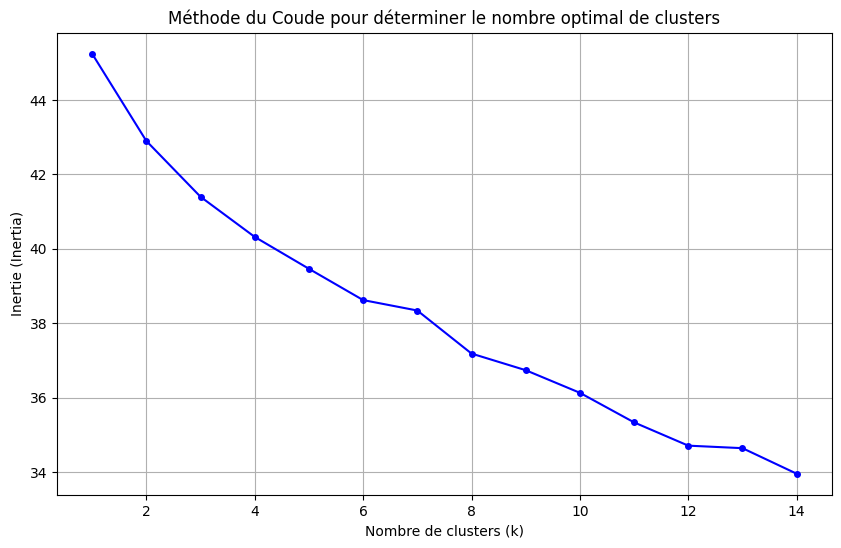

In [44]:
inertia_values = []
k_range = range(1, 15)  # On teste de 1 à 14 clusters

for k in k_range:
    # Initialisation et entraînement pour chaque k
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(embeddings)
    
    # On récupère l'inertie
    inertia_values.append(kmeans_model.inertia_)

# Plotting de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-', markersize=4)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Inertia)')
plt.title('Méthode du Coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()

In [10]:
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [11]:
labels = kmeans.labels_
df_results = pd.DataFrame({'question': questions_it, 'cluster': labels})

print("Résultats du regroupement :")
print(df_results.sort_values(by='cluster'))

Résultats du regroupement :
                                              question  cluster
15          Comment configurer Outlook sur un mobile ?        0
58                Comment configurer le double écran ?        0
44        Comment configurer une adresse IP statique ?        0
33         Comment ajouter un utilisateur au domaine ?        0
82      Comment désactiver les notifications Windows ?        0
..                                                 ...      ...
192   Comment désactiver les mises à jour de pilotes ?        3
207  Le gestionnaire de tâches est désactivé par l'...        3
206              Comment désactiver les sons système ?        3
208  Comment réparer un problème de mise à l'échell...        3
210  Comment réinitialiser les permissions d'un dos...        3

[212 rows x 2 columns]


In [12]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(embeddings)

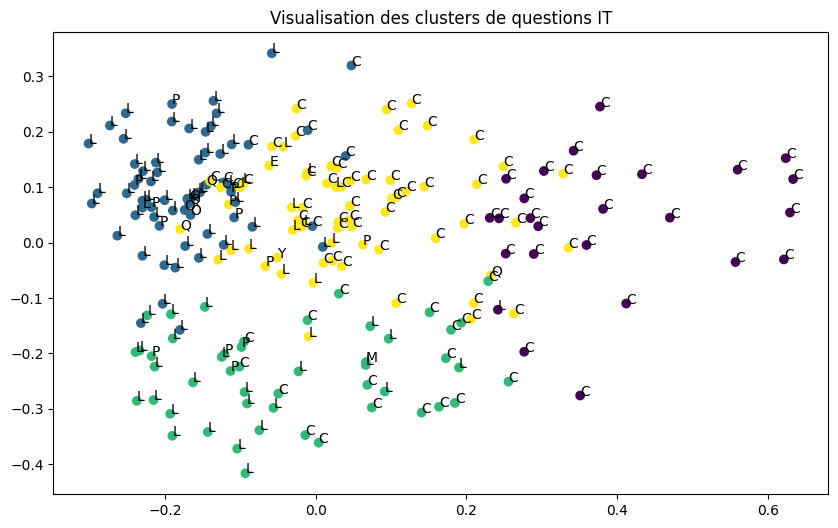

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')
for i, txt in enumerate(questions_it):
    plt.annotate(txt[:1], (reduced_features[i, 0], reduced_features[i, 1]))
plt.title("Visualisation des clusters de questions IT")
plt.show()